# 4. Ingeniería de Características

## Imputación de datos faltantes:
Imputamos los valores faltantes de TotalCharges utilizando tanto la media como la mediana.

In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [11]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [13]:
# Verificación inicial de datos faltantes
print("Datos faltantes antes de la imputación:")
print(df.isnull().sum())

Datos faltantes antes de la imputación:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


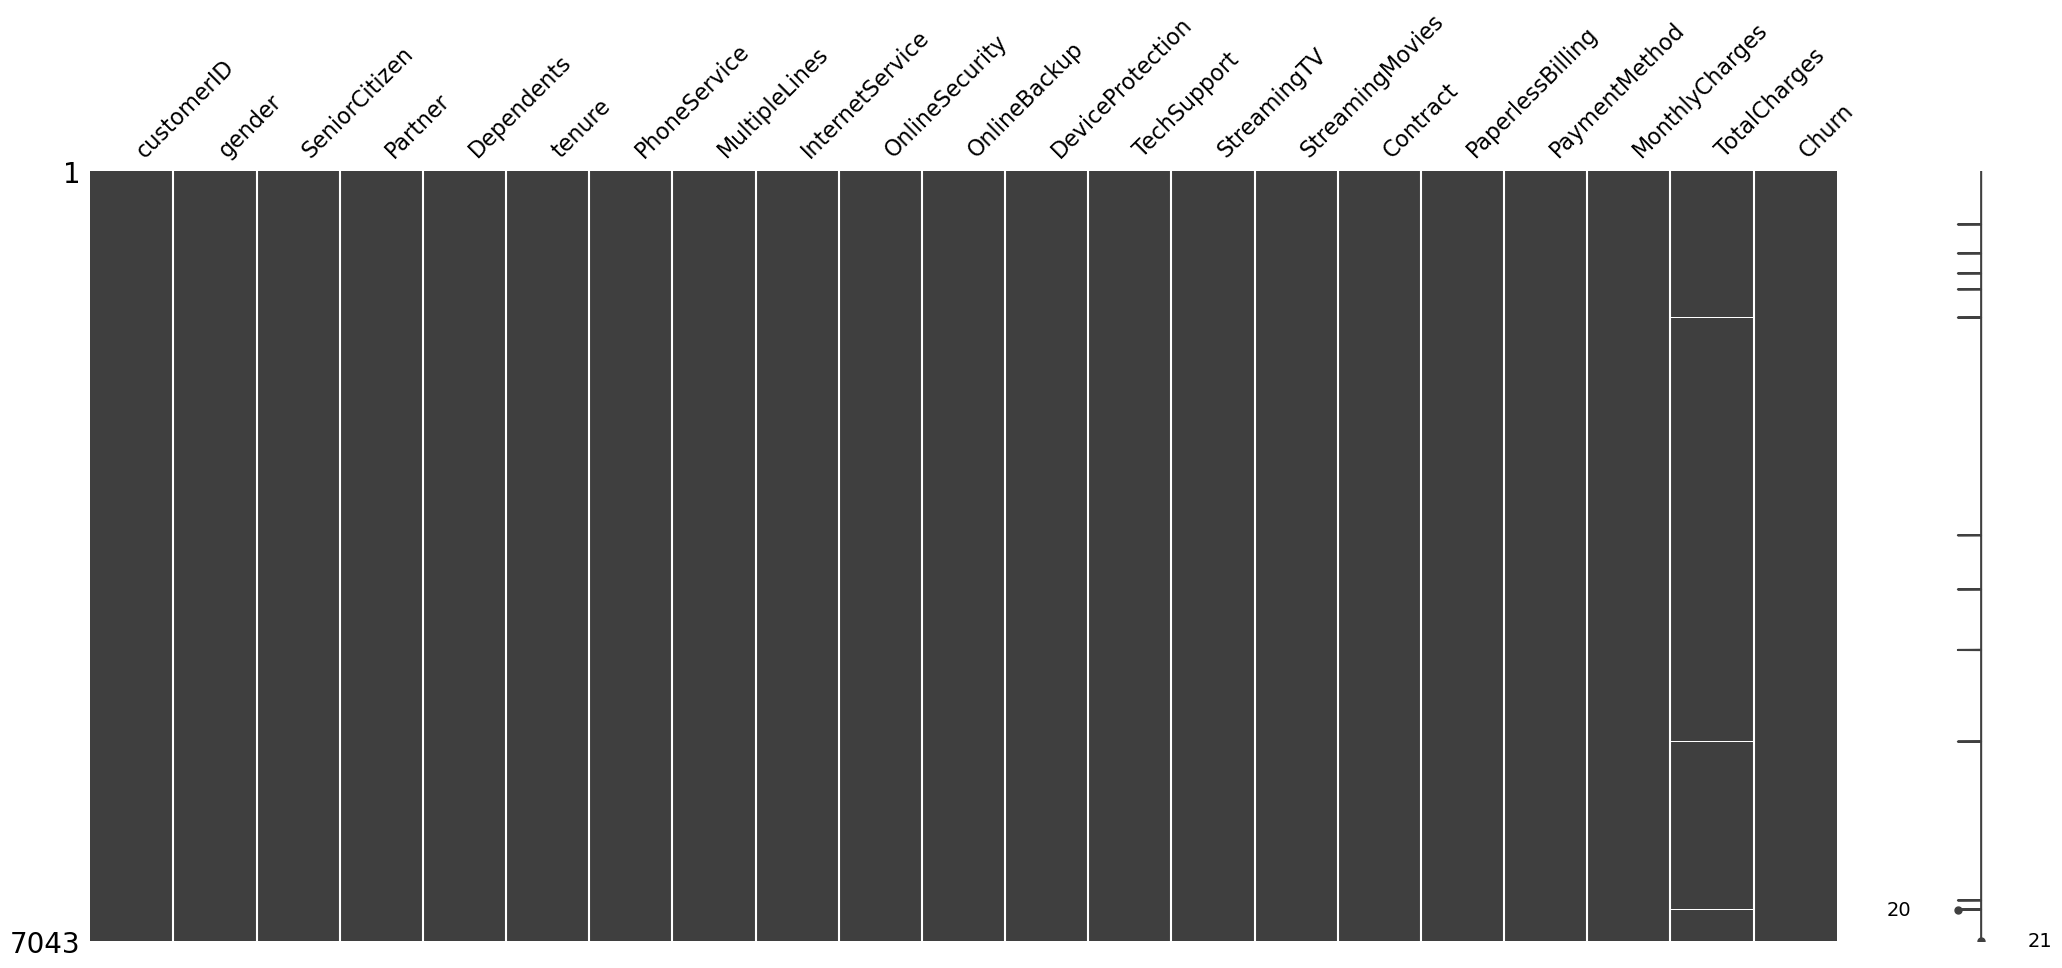

In [15]:
msno.matrix(df);

In [17]:
# Cargar el dataset a un nuevo dataframe con 3 columnas a usar
dataT = pd.read_csv('Telco-Customer-Churn.csv', usecols=['TotalCharges', 'MonthlyCharges', 'Churn'])

# Convertir 'TotalCharges' a numérico, forzando los errores a NaN
dataT['TotalCharges'] = pd.to_numeric(dataT['TotalCharges'], errors='coerce')

# Mostrar las primeras filas del dataset
print(dataT.head())

   MonthlyCharges  TotalCharges Churn
0           29.85         29.85    No
1           56.95       1889.50    No
2           53.85        108.15   Yes
3           42.30       1840.75    No
4           70.70        151.65   Yes


In [19]:
# Calcular la proporción de datos faltantes
print(dataT.isnull().mean())

MonthlyCharges    0.000000
TotalCharges      0.001562
Churn             0.000000
dtype: float64


In [21]:
# Calcular la media y la mediana
mediana = dataT['TotalCharges'].median()
mean = dataT['TotalCharges'].mean()
print("La mediana es:") 
print(mediana)
print("La media es:")
print(mean)

La mediana es:
1397.475
La media es:
2283.3004408418656


In [23]:
# Imputar los valores faltantes con la media y la mediana
dataT['TotalCharges_Mean'] = np.round(dataT['TotalCharges'].fillna(mean), 2)
dataT['TotalCharges_Median'] = np.round(dataT['TotalCharges'].fillna(mediana), 2)

# Mostrar las primeras filas del dataset con las nuevas columnas
print(dataT.head())

   MonthlyCharges  TotalCharges Churn  TotalCharges_Mean  TotalCharges_Median
0           29.85         29.85    No              29.85                29.85
1           56.95       1889.50    No            1889.50              1889.50
2           53.85        108.15   Yes             108.15               108.15
3           42.30       1840.75    No            1840.75              1840.75
4           70.70        151.65   Yes             151.65               151.65


### Visualización de la Distribución de Datos
Densidad de las distribuciones de TotalCharges antes y después de la imputación.

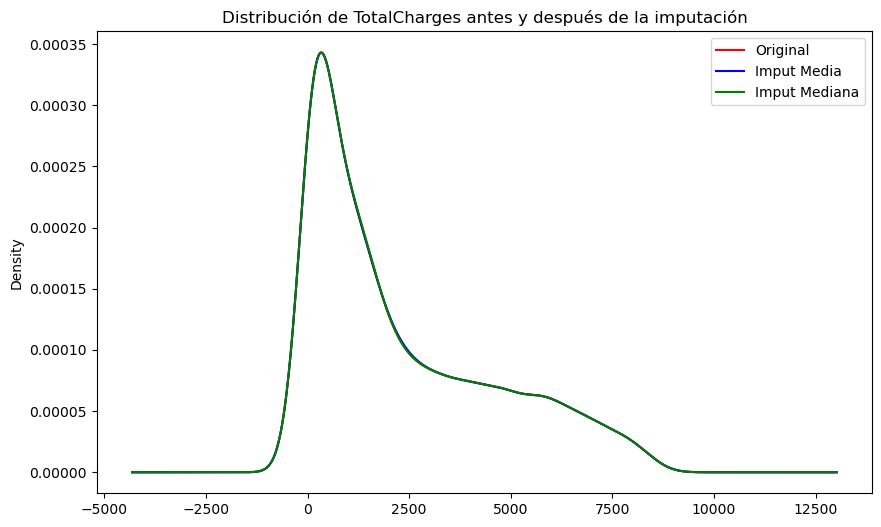

In [25]:
# Visualización de las distribuciones
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

dataT['TotalCharges'].plot.density(color='red', label='Original')
dataT['TotalCharges_Mean'].plot.density(color='blue', label='Imput Media')
dataT['TotalCharges_Median'].plot.density(color='green', label='Imput Mediana')

ax.legend()
plt.title('Distribución de TotalCharges antes y después de la imputación')
plt.show()

### Comparación de la Varianza
Comparamos la varianza de TotalCharges antes y después de la imputación para evaluar el impacto de las diferentes estrategias de imputación.

In [27]:
# Comparación de la varianza
print("Varianza Original:", dataT['TotalCharges'].var())
print("Varianza Imputación Media:", dataT['TotalCharges_Mean'].var())
print("Varianza Imputación Mediana:", dataT['TotalCharges_Median'].var())

Varianza Original: 5138252.40705357
Varianza Imputación Media: 5130226.16784913
Varianza Imputación Mediana: 5131449.964424196


### Imputación por Media y Mediana

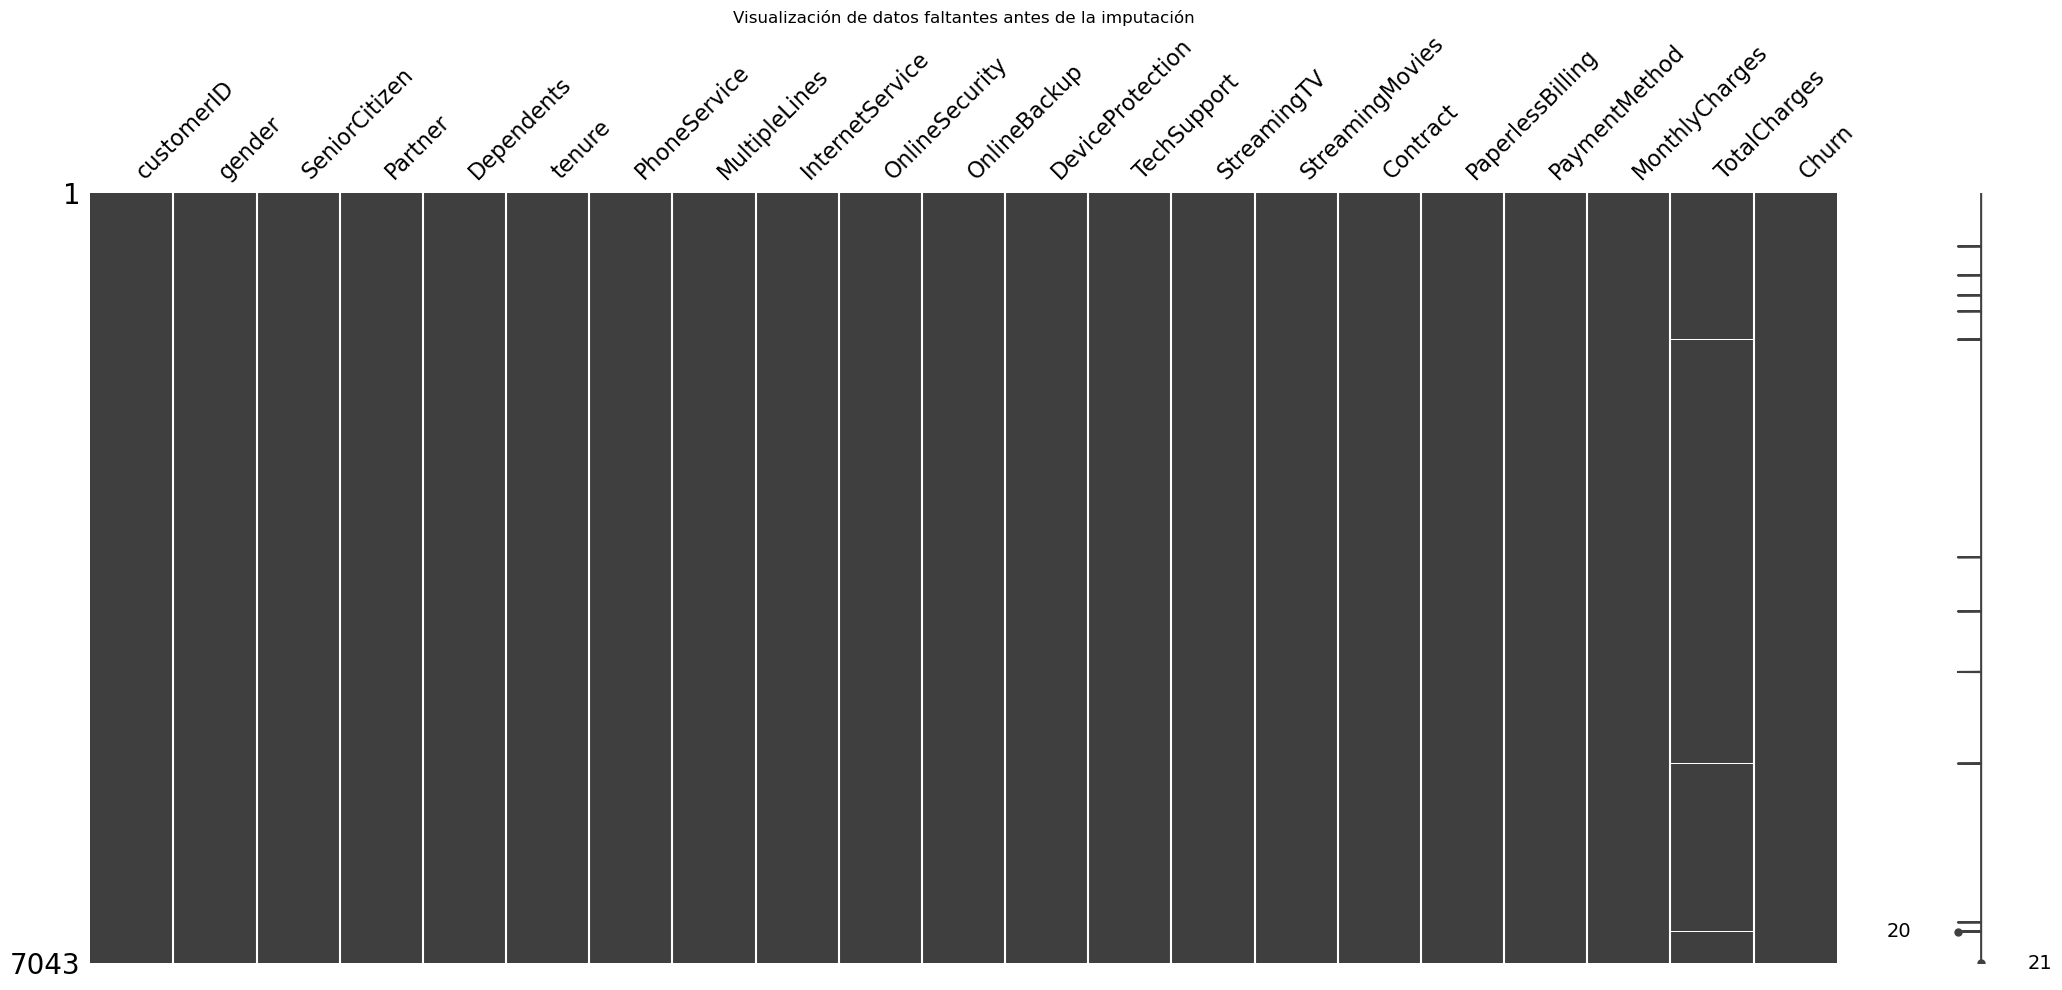

In [29]:
# Visualización de datos faltantes antes de la imputación
msno.matrix(df)
plt.title('Visualización de datos faltantes antes de la imputación')
plt.show()

In [31]:
# Imputación de variables numéricas
mediana_totalcharges = df['TotalCharges'].median()
df['TotalCharges'].fillna(mediana_totalcharges, inplace=True)

In [33]:
# Imputación de variables categóricas
df.fillna(df.mode().iloc[0], inplace=True)

In [35]:
# Verificación después de la imputación
print("Datos faltantes después de la imputación:")
print(df.isnull().sum())

Datos faltantes después de la imputación:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


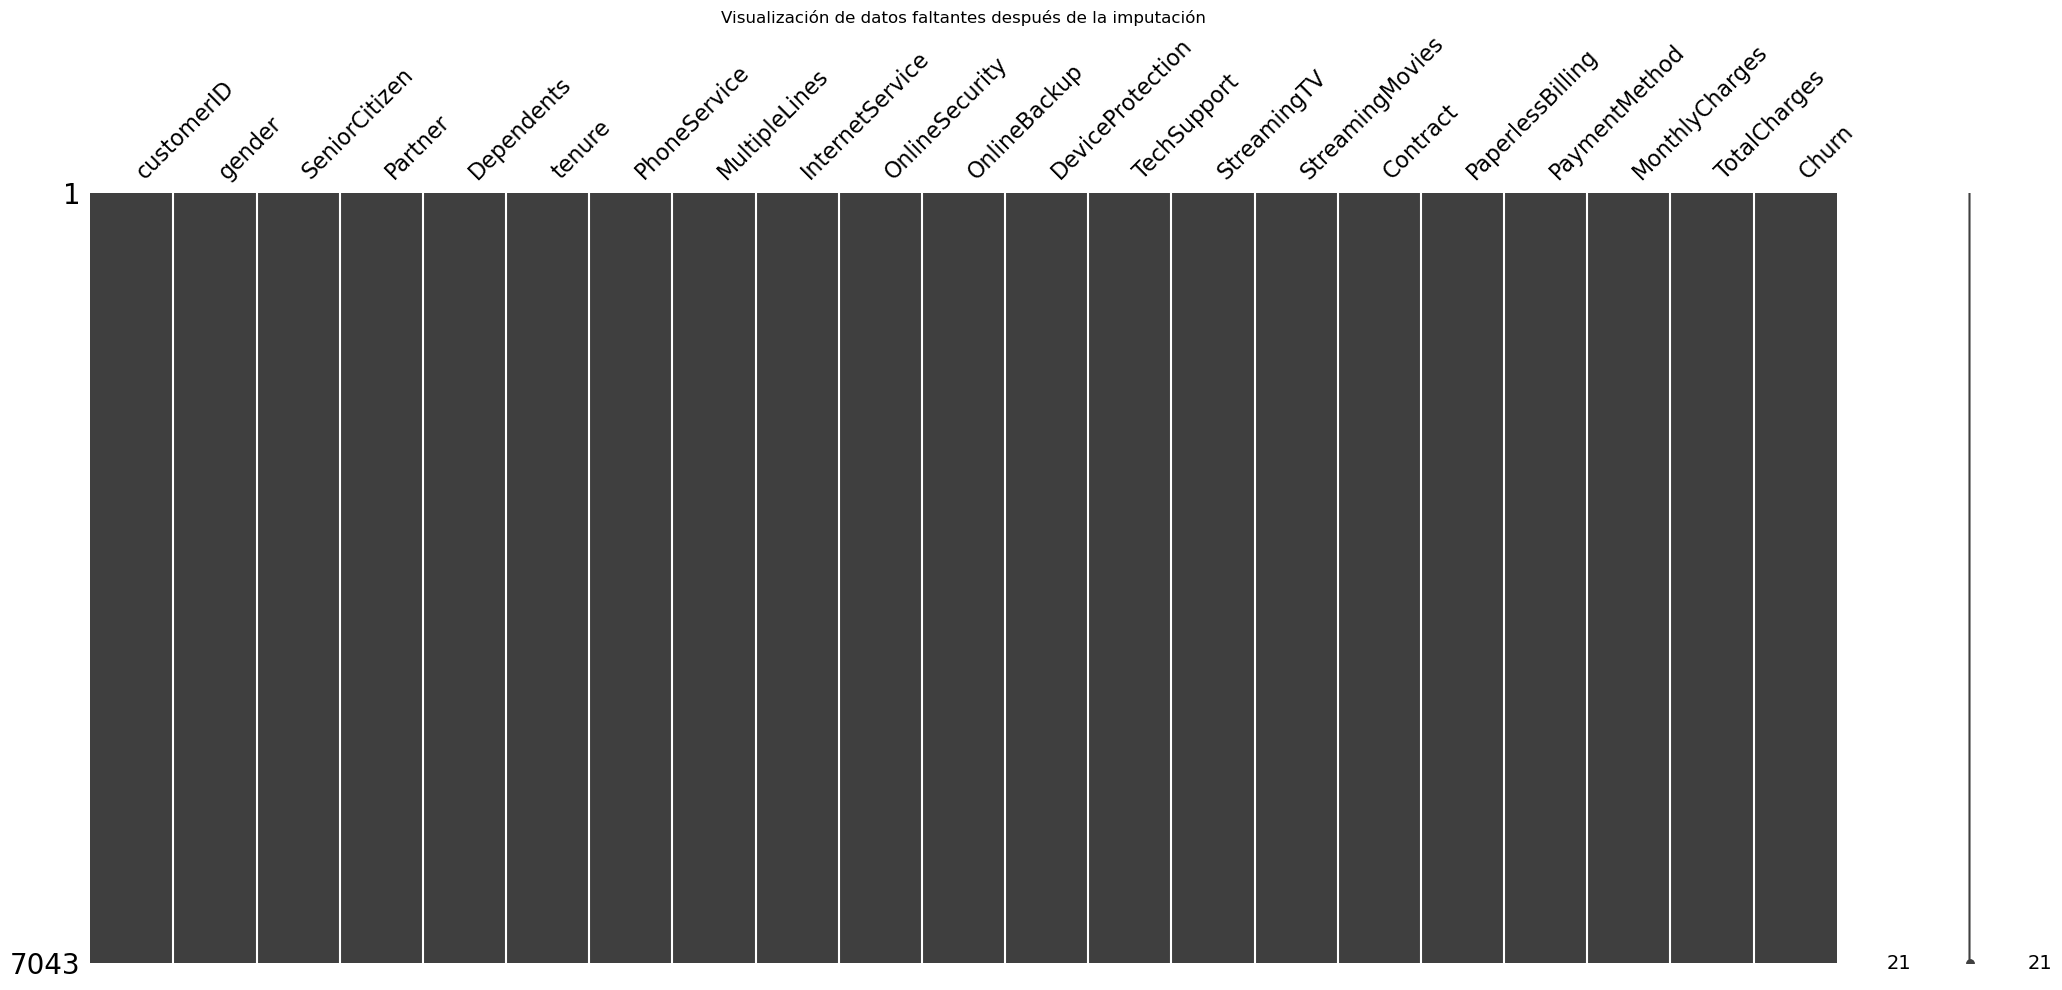

In [37]:
# Visualización de datos faltantes después de la imputación
msno.matrix(df)
plt.title('Visualización de datos faltantes después de la imputación')
plt.show()

### Codificación de variables categóricas:

In [39]:
# Verificación de variables categóricas antes de la codificación
print("Tipos de datos antes de la codificación:")
print(df.dtypes)

Tipos de datos antes de la codificación:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [147]:
# Codificación One-Hot para variables categóricas
df_codificado = pd.get_dummies(df, drop_first=True)

# Verificación de las columnas después de la codificación
print(df_codificado.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  StreamingTV_Ye

### Transformación de variables numéricas:

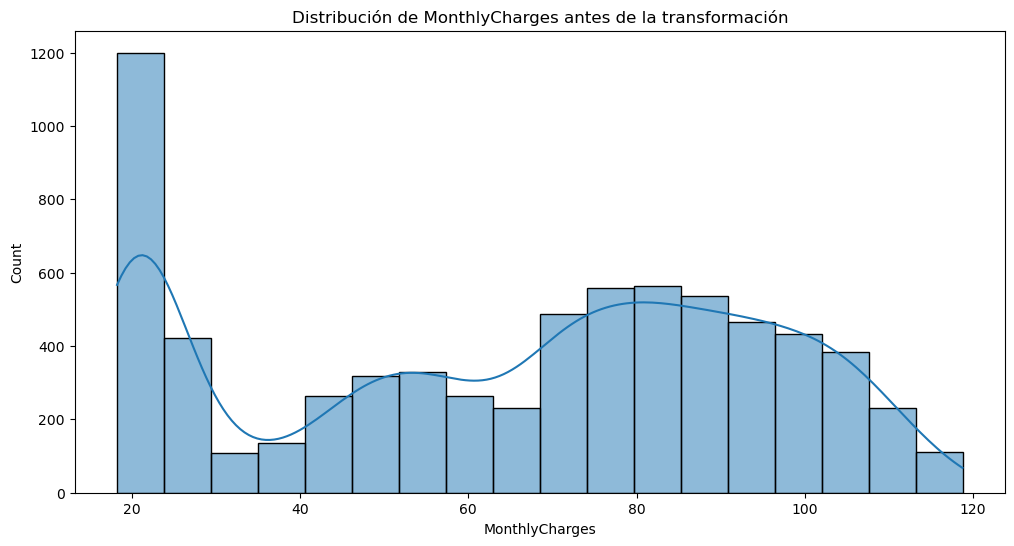

In [41]:
# Histograma antes de la transformación
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges antes de la transformación')
plt.show()

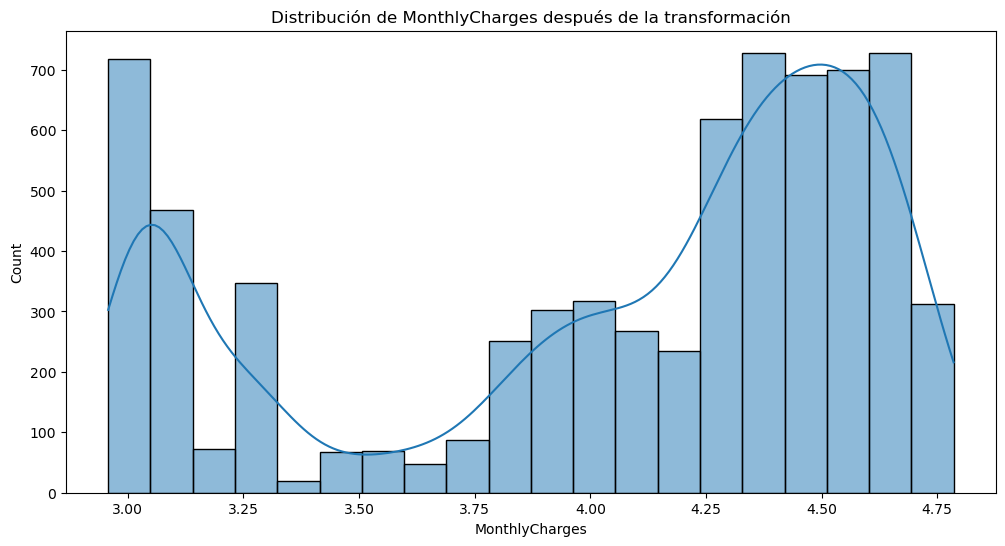

In [43]:
# Transformación logarítmica (ejemplo)
df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])

# Histograma después de la transformación
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges después de la transformación')
plt.show()

### Tratamiento de outliers:

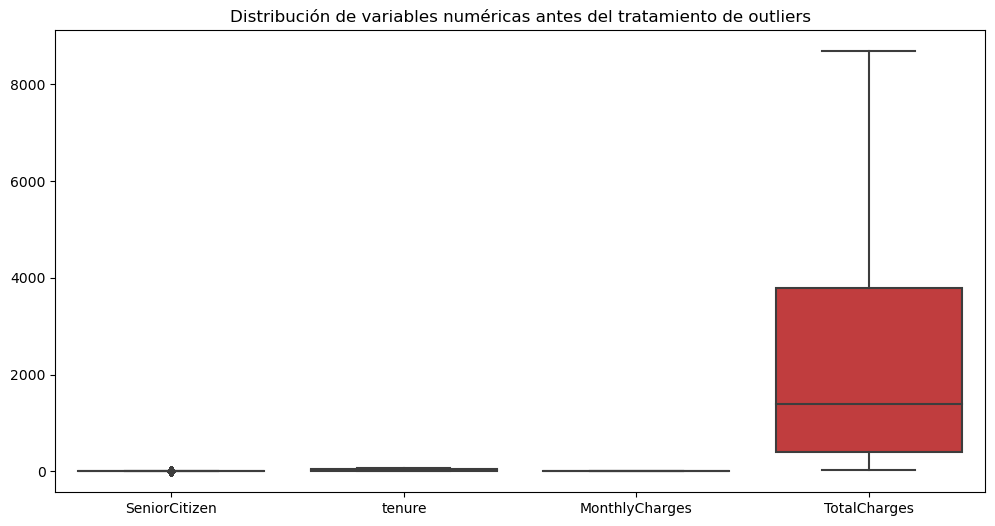

In [47]:
from scipy.stats import zscore

# Boxplot antes del tratamiento de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Distribución de variables numéricas antes del tratamiento de outliers')
plt.show()

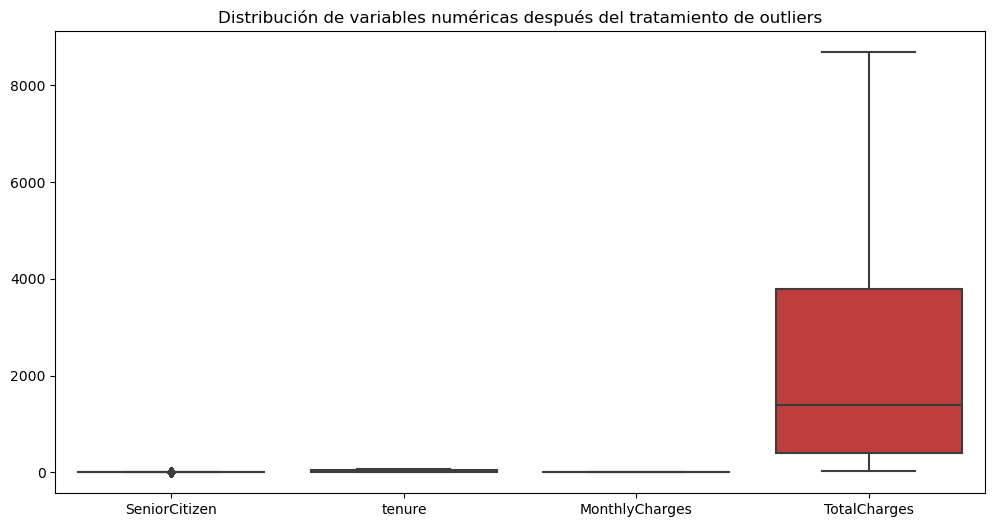

In [49]:
# Tratamiento de outliers
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Boxplot después del tratamiento de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Distribución de variables numéricas después del tratamiento de outliers')
plt.show()

### Estandarización de variables:

In [51]:
from sklearn.preprocessing import StandardScaler

# Descripción estadística antes de la estandarización
print("Descripción estadística antes de la estandarización:")
print(df.describe())

Descripción estadística antes de la estandarización:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149        4.043347   2281.916928
std         0.368612    24.559481        0.580288   2265.270398
min         0.000000     0.000000        2.957511     18.800000
25%         0.000000     9.000000        3.597312    402.225000
50%         0.000000    29.000000        4.267597   1397.475000
75%         0.000000    55.000000        4.509210   3786.600000
max         1.000000    72.000000        4.785406   8684.800000


In [53]:
# Estandarización de variables
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Descripción estadística después de la estandarización
print("Descripción estadística después de la estandarización:")
print(df.describe())

Descripción estadística después de la estandarización:
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count   7.043000e+03  7.043000e+03    7.043000e+03  7.043000e+03
mean   -4.842546e-17 -2.421273e-17   -2.335520e-16 -1.488074e-17
std     1.000071e+00  1.000071e+00    1.000071e+00  1.000071e+00
min    -4.399165e-01 -1.318165e+00   -1.871335e+00 -9.991203e-01
25%    -4.399165e-01 -9.516817e-01   -7.686980e-01 -8.298459e-01
50%    -4.399165e-01 -1.372744e-01    3.864748e-01 -3.904632e-01
75%    -4.399165e-01  9.214551e-01    8.028709e-01  6.642871e-01
max     2.273159e+00  1.613701e+00    1.278869e+00  2.826743e+00


In [57]:
# Guardar el DataFrame procesado como un archivo CSV en la carpeta del repositorio
df.to_csv('Telco-Customer-Churn-Processed.csv', index=False)